# Obtendo a Fronteira Eficiente de markowitz

In [2]:
#vamos caregar o modulo pandas
import pandas as pd
#importar biblioteca do pandas datareader
from pandas_datareader import data as pdr
#importar a bliblioteca Numpy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
carteira = ['VVAR3.SA','^BVSP']
mdata = pd.DataFrame()
for t in carteira:
    mdata[t] = pdr.DataReader(t,data_source='yahoo',start='2010-1-1', end = "'2017-03-24'")['Adj Close']

In [110]:
mdata.tail()

,VVAR3.SA,^BVSP
Date,,
2017-03-20,4.109661,64884
2017-03-21,3.960400,62980
2017-03-22,3.880794,63521
2017-03-23,4.020104,63531
2017-03-24,3.761384,63854


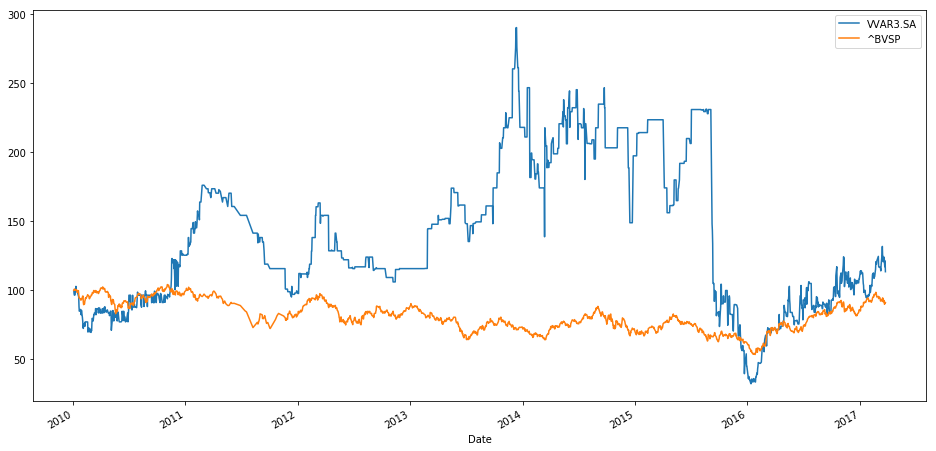

In [111]:
#normalizar valores pegos os valores da primeira possição e transformo na base 100 ai todos vao sair da msm origem
#va
(mdata / mdata.iloc[0] * 100).plot(figsize = (16,8));

In [112]:
#vamos criar um data frame novo com os dados de retorno em log... sabemos que em log é o melhor jeito se for ativos individuais
df_log= np.log(mdata / mdata.shift(1))
print(df_log.head())

            VVAR3.SA     ^BVSP
Date                          
2010-01-04       NaN       NaN
2010-01-05 -0.025400  0.002780
2010-01-06 -0.009944  0.006938
2010-01-07  0.002661 -0.003938
2010-01-08 -0.000665 -0.002672


In [113]:
df_log.mean()*250

VVAR3.SA    0.019185
^BVSP      -0.014004
dtype: float64

In [114]:
df_log.cov()*250

,VVAR3.SA,^BVSP
VVAR3.SA,0.536688,0.015338
^BVSP,0.015338,0.058011


In [115]:
df_log.corr()

,VVAR3.SA,^BVSP
VVAR3.SA,1.000000,0.086927
^BVSP,0.086927,1.000000


In [116]:
#Contador de ativos
numero_ativos  = len(carteira)
numero_ativos

2

In [117]:
pesos_ativos = np.random.random(numero_ativos)
pesos_ativos /= np.sum(pesos_ativos)
pesos_ativos


array([0.57348953, 0.42651047])

In [118]:
pesos_ativos[0]+pesos_ativos[1]

1.0

# Expectativa de portifolio: retorno

In [119]:
np.sum(pesos_ativos * df_log.mean())*250 

0.005029452702570744

# Expectativa de portifolio: Variencia 

In [120]:
np.dot(pesos_ativos.T, np.dot(df_log.cov()*250 , pesos_ativos))

0.19456755606141782

# Expectativa de portifolio: Valotilidade

In [121]:
np.sqrt(np.dot(pesos_ativos.T, np.dot(df_log.cov()*250 , pesos_ativos)))

0.441098125207326

# Agora mos simular o portilofio com 1000 possiveis pessos dos ativos, visanto testar qual o pesso mais eficiente para a carteria

In [122]:
#criamos duas listas vazias para acumular os valores nelas gerados pelas 10oo simulaçoes
retorno_portifolio = []
valatilidade_portifolio = []

for x in range (1000):
    pesos_ativos = np.random.random(numero_ativos)
    pesos_ativos /= np.sum(pesos_ativos)
    retorno_portifolio.append(np.sum(pesos_ativos * df_log.mean()) * 250)
    valatilidade_portifolio.append(np.sqrt(np.dot(pesos_ativos.T,np.dot(df_log.cov() * 250, pesos_ativos))))


    
retorno_portifolio, valatilidade_portifolio

([0.007783048668428279,
  0.002779695430355152,
  0.0022270972118187127,
  0.004029960949633987,
  0.0011664040256144403,
  0.010286220206488148,
  -0.012191139743267493,
  0.005937015875001202,
  0.0014898407785988463,
  -0.010210455683341908,
  0.00016111487315314196,
  0.013304325432114735,
  -0.013696125538781113,
  0.01202281422969122,
  0.006445048741292289,
  0.001073140681253991,
  0.0005499672532688308,
  -0.0015852340909140996,
  0.007318399283635822,
  0.0007656921456390939,
  -0.00395907784214215,
  0.005787979278029269,
  -0.0015244062232278852,
  -0.0003104389668775894,
  0.0004567001866844897,
  -0.007278224475323226,
  -0.0006632489049884665,
  0.006215321793194551,
  0.003029541449320277,
  -0.0036708344525368144,
  0.01182370593350264,
  0.0025767037980160105,
  0.004948776399528793,
  0.007735584032819681,
  0.017670573325157857,
  0.0019132471255382763,
  0.002267023232058542,
  -0.008405917016478217,
  -0.0037089449673856755,
  0.005044791943403356,
  -0.0021928926

In [123]:
#para facilitar meu trabalho vou transformar em arrays os resultados por trabalahr com matrizes é mais facil doque uma lista impossibel de qualcular
#criamos duas listas vazias para acumular os valores nelas gerados pelas 10oo simulaçoes

retorno_portifolio = []
valatilidade_portifolio = []

for x in range (1000):
    pesos_ativos = np.random.random(numero_ativos)
    pesos_ativos /= np.sum(pesos_ativos)
    retorno_portifolio.append(np.sum(pesos_ativos * df_log.mean()) * 250)
    valatilidade_portifolio.append(np.sqrt(np.dot(pesos_ativos.T,np.dot(df_log.cov() * 250, pesos_ativos))))


retorno_portifolio = np.array(retorno_portifolio)
valatilidade_portifolio = np.array(valatilidade_portifolio)

    
retorno_portifolio, valatilidade_portifolio

(array([ 3.75328045e-03, -7.41421823e-04,  9.08983400e-05,  1.38495481e-03,
         1.10752685e-02, -1.36339339e-02, -1.00350209e-02, -2.61788561e-03,
         1.33650009e-02,  3.87283740e-03, -7.71301527e-04,  5.99950931e-03,
         2.15562743e-03, -8.10799800e-03, -2.26607300e-03,  6.78702371e-03,
        -5.64167593e-03,  1.08317890e-02, -5.12859980e-03,  1.15259934e-02,
        -4.90282458e-04,  7.20178636e-04,  5.37893467e-03,  8.53462201e-03,
        -6.85795783e-04,  4.26428534e-03,  4.22319111e-03,  1.34729239e-02,
         1.01489463e-02,  1.13423810e-02,  6.13316050e-03,  2.88290525e-03,
         3.01767299e-03, -4.31498845e-03, -3.02014999e-03, -9.24128784e-03,
         1.77481165e-03,  1.30536751e-03,  6.59051502e-03,  4.54544293e-03,
         1.01365812e-02,  5.13553296e-04,  1.66827279e-02,  4.85877466e-03,
         8.67164012e-03,  1.86742908e-03, -9.86534877e-03, -6.45711122e-04,
         6.16651484e-04, -3.39423094e-03,  8.13268939e-03,  3.16709250e-03,
         1.5

# Agora vamos plotar um grafico para finalizar e viluzalizar bem a curso de Markowitz

In [124]:
# vamos criar uma tabela para organizar.... o nome é dicionario coisa basica
portifolios  = pd.DataFrame({'Retornos':retorno_portifolio,'Volatilidade':valatilidade_portifolio}) 

In [125]:
portifolios.head()

,Retornos,Volatilidade
0,0.003753,0.416903
1,-0.000741,0.337600
2,0.000091,0.351415
3,0.001385,0.373767
4,0.011075,0.561768


In [126]:
portifolios.tail()

,Retornos,Volatilidade
995,-0.009583,0.238013
996,-0.012577,0.235337
997,0.013892,0.620270
998,0.001393,0.373903
999,-0.007791,0.248597


Text(0,0.5,'Expectativa de Retornos')

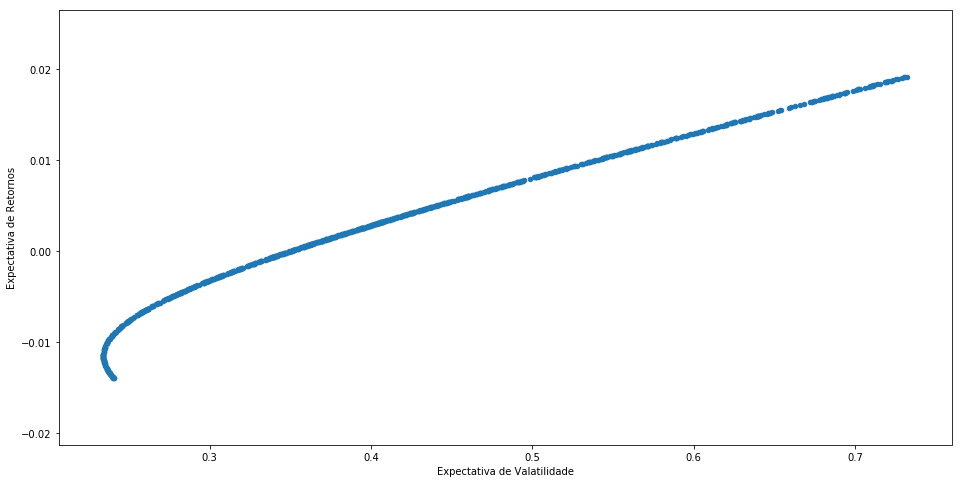

In [127]:
#agora vamos ao Grafico:
portifolios.plot(x='Volatilidade', y='Retornos', kind='scatter',figsize=(16,8))
plt.xlabel('Expectativa de Valatilidade')
plt.ylabel('Expectativa de Retornos')
